In [206]:
# import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [207]:
df = pd.read_csv('./training_set_values.csv', index_col='id')

In [208]:
df_logic = pd.isnull(df)
np.sum(df_logic)

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [209]:
df.drop(['date_recorded', 'funder', 'wpt_name', 'recorded_by', 'longitude', 'latitude', 'num_private', 'subvillage', 'region', 'lga', 'ward', 'scheme_name'], axis=1, inplace=True)

In [210]:
df.shape

(59400, 27)

In [211]:
df_logic = pd.isnull(df)
np.sum(df_logic)

amount_tsh                  0
gps_height                  0
installer                3655
basin                       0
region_code                 0
district_code               0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
dtype: int64

In [212]:
df.dropna(axis=0, how='any', inplace=True)

In [213]:
df.shape

(48685, 27)

In [214]:
from sklearn import preprocessing

In [215]:
df.head(5)

,amount_tsh,gps_height,installer,basin,region_code,district_code,population,public_meeting,scheme_management,permit,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,Roman,Lake Nyasa,11,5,109,True,VWC,False,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
34310,25.0,686,World vision,Pangani,21,4,250,True,VWC,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,263,UNICEF,Ruvuma / Southern Coast,90,63,58,True,VWC,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9944,20.0,0,DWE,Pangani,4,8,1,True,VWC,True,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0.0,0,DWSP,Internal,17,3,0,True,VWC,True,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [216]:
df_mapped = df.copy()

In [217]:
le = preprocessing.LabelEncoder() # le transforms labels to numbers

In [218]:
# check what kind of information is contained in each column
# it's necessary to check that numerical columns like "year of construction" don't contain text-rows such as "unknown", "None" 
# or something else
for cname, column in df.iteritems(): # loop over all columns
    le.fit(df[cname]) # find label-classes in a column 
    print('There are ', np.size(list(le.classes_)), ' classes in "',cname,'" column')
    print(list(le.classes_),'\n')
    sizes = [int(np.sum(df[cname] == list(le.classes_)[i])) for i in range (np.size(list(le.classes_)))]
    print('Size of each class: ', sizes, '\n')
    #g = plt.bar(range(0,np.size(le.classes_)), sizes, tick_label=list(le.classes_))

There are  91  classes in " amount_tsh " column
[0.0, 0.20000000000000001, 1.0, 2.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0, 15.0, 20.0, 25.0, 30.0, 33.0, 35.0, 40.0, 50.0, 53.0, 60.0, 70.0, 100.0, 150.0, 200.0, 220.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 520.0, 550.0, 590.0, 600.0, 700.0, 750.0, 800.0, 900.0, 1000.0, 1200.0, 1300.0, 1400.0, 1500.0, 2000.0, 2200.0, 2400.0, 2500.0, 2800.0, 3000.0, 3500.0, 3600.0, 4000.0, 4500.0, 4700.0, 5000.0, 5400.0, 5500.0, 6000.0, 6300.0, 6500.0, 7000.0, 7200.0, 7500.0, 8000.0, 8500.0, 10000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 16300.0, 18000.0, 20000.0, 25000.0, 26000.0, 30000.0, 38000.0, 40000.0, 45000.0, 50000.0, 60000.0, 70000.0, 100000.0, 117000.0, 138000.0, 170000.0, 200000.0, 250000.0] 

Size of each class:  [32546, 2, 3, 13, 373, 188, 69, 1, 795, 1, 15, 1378, 320, 673, 20, 8, 58, 2036, 1, 14, 22, 613, 20, 1048, 1, 563, 524, 3, 41, 42, 2787, 2, 3, 2, 156, 23, 59, 2, 1, 1381, 264, 10, 1, 182, 669, 31, 145, 136, 14, 325, 5, 42,

Size of each class:  [1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 6, 7, 2, 6, 4, 5, 9, 6, 12, 7, 12, 11, 10, 7, 10, 10, 17, 18, 15, 18, 27, 28, 19, 19, 23, 36, 25, 34, 33, 37, 40, 32, 39, 50, 37, 43, 26, 39, 22, 35, 33, 34, 39, 33, 33, 34, 32, 18, 16172, 25, 19, 18, 20, 20, 25, 19, 19, 16, 17, 18, 26, 19, 20, 18, 15, 27, 17, 18, 19, 14, 15, 18, 12, 21, 31, 16, 14, 12, 23, 9, 14, 17, 11, 14, 22, 16, 19, 19, 23, 20, 16, 21, 22, 24, 18, 11, 20, 18, 21, 18, 17, 16, 23, 20, 20, 19, 11, 15, 22, 14, 18, 12, 19, 6, 19, 13, 21, 9, 16, 12, 12, 13, 14, 12, 14, 13, 11, 10, 19, 11, 17, 16, 11, 19, 16, 16, 17, 13, 18, 15, 16, 15, 12, 11, 19, 5, 18, 15, 18, 14, 20, 17, 15, 17, 14, 13, 11, 11, 14, 8, 14, 6, 13, 17, 15, 16, 17, 12, 11, 14, 11, 9, 13, 16, 15, 8, 11, 5, 8, 13, 12, 9, 12, 11, 7, 6, 5, 7, 19, 9, 10, 10, 12, 7, 8, 5, 6, 11, 9, 15, 8, 10, 7, 14, 16, 9, 12, 10, 6, 14, 9, 12, 14, 10, 10, 10, 11, 11, 13, 12, 21, 8, 9, 21, 10, 21, 6, 16, 9, 12, 15, 16, 13, 12, 18, 14, 9, 17, 13, 13, 16, 15, 10, 12, 14, 3, 

Size of each class:  [2, 344, 1, 4, 29, 1, 1, 2, 3, 277, 1, 3, 2, 14, 4, 5, 1, 54, 6, 3, 4, 1, 1, 6, 1, 11, 8, 83, 9, 1, 1, 1, 6, 6, 9, 284, 5, 1, 2, 1, 2, 2, 1, 2, 10, 4, 10, 1, 30, 8, 1, 1, 23, 2, 1, 76, 55, 17, 60, 1, 24, 4, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 108, 92, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 10, 6, 2, 1, 1, 5, 1, 1, 1, 1, 1, 13, 26, 1, 5, 1, 1, 8, 1, 3, 35, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 5, 1, 1, 1, 1, 2, 9, 4, 41, 25, 1, 1, 2, 9, 1, 40, 75, 1, 14, 610, 19, 1, 1, 1, 1, 2, 1, 3, 4, 1, 1, 10, 1, 1, 2, 2, 2, 1, 5, 21, 17, 1, 2, 27, 24, 27, 1, 2, 1, 4, 2, 1, 1, 22, 22, 7, 6, 1, 1, 1, 5, 1, 1, 1, 4, 4, 2, 1, 13, 7, 4, 23, 5, 14, 6, 162, 1, 1, 110, 1, 616, 129, 1, 34, 1, 75, 1, 5, 5, 1, 1, 17, 4, 1, 6, 1, 55, 2, 1, 1059, 43, 542, 2, 1, 2, 11, 17, 7, 2, 7, 12, 11, 5, 116, 3, 21, 1, 8, 22, 12, 1, 5, 7, 1, 2, 10, 1, 84, 1, 2, 17, 2, 1, 5, 11, 12, 1, 552, 861, 1, 1, 1, 1, 1, 6, 1, 2, 1, 64, 1, 3, 5, 2, 7, 8

Size of each class:  [17113, 5748, 4, 2, 12, 43, 14, 3, 21, 11, 147, 7, 37, 9, 18, 187, 7, 6, 15, 3, 423, 3, 8, 23, 15, 244, 10, 2, 9, 7, 556, 1, 15, 8, 9, 241, 51, 3, 9, 3, 523, 3, 28, 7, 10, 195, 6, 4, 21, 9, 1013, 8, 30, 58, 19, 113, 137, 14, 25, 15, 537, 4, 4, 28, 5, 172, 4, 6, 24, 18, 184, 5, 21, 7, 4, 277, 25, 5, 27, 12, 459, 2, 5, 9, 12, 64, 60, 5, 10, 54, 240, 1, 6, 4, 5, 44, 65, 6, 73, 16, 904, 4, 21, 8, 1, 39, 6, 3, 20, 17, 62, 12, 10, 7, 21, 2, 6, 3, 2, 807, 4, 3, 51, 10, 110, 29, 4, 8, 3, 251, 2, 19, 4, 11, 39, 11, 1, 3, 210, 1, 11, 14, 11, 60, 15, 4, 9, 13, 1688, 1, 9, 28, 14, 21, 51, 4, 4, 6, 105, 3, 6, 9, 3, 21, 1, 7, 16, 3, 67, 1, 7, 7, 51, 8, 1, 8, 5, 170, 3, 11, 10, 6, 30, 11, 2, 8, 17, 47, 8, 2, 3, 27, 8, 1, 9, 3, 1496, 2, 4, 22, 6, 32, 9, 3, 5, 7, 186, 11, 14, 19, 18, 46, 7, 7, 7, 9, 63, 9, 2, 7, 1, 50, 3, 2, 2, 2, 322, 18, 6, 7, 20, 39, 15, 2, 4, 5, 141, 17, 4, 9, 4, 43, 9, 4, 5, 7, 1276, 6, 3, 18, 16, 17, 46, 6, 23, 7, 96, 6, 2, 8, 9, 15, 8, 4, 7, 10, 64, 3, 3, 3,

In [219]:
# mapping
for cname, column in df.iteritems(): # loop over all columns    
    first_element = column.values[0] # first element in each column
    if isinstance(first_element, str) == True or isinstance(first_element, bool): # check if the first element is a string or boolean
        le.fit(df[cname]) # find label-classes in a column 
        print('There are ', np.size(list(le.classes_)), ' classes in "',cname,'" column')
        print(list(le.classes_), '\n')
        df_mapped[cname] = le.transform(df_mapped[cname]) # transform a column to numbers
    # for every column:    
    df_mapped[cname] = preprocessing.scale(df_mapped[cname]) # transform a column to normalized numbers

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


There are  1800  classes in " installer " column
['-', '0', 'A.D.B', 'AAR', 'ABASIA', 'ABD', 'ABDUL', 'AC', 'ACORD', 'ACRA', 'ACTION AID', 'ACTIVE TANK CO', 'ACTIVE TANK CO LTD', 'AD', 'ADAP', 'ADB', 'ADP', 'ADRA', 'ADRA /Government', 'ADRA/Government', 'AF', 'AFRICA', 'AFRICA MUSLIM', 'AFRICAN DEVELOPMENT FOUNDATION', 'AFRICAN REFLECTIONS FOUNDATION', 'AI', 'AIC', 'AICT', 'AIMGOLD', 'AIXOS', 'ALIA', 'ALLYS', 'AMP Contract', 'AMP Contracts', 'AMP contractor', 'AMREF', 'ANGLI', 'ANGLIKANA CHURCH', 'ANGRIKANA', 'ANSWAR', 'APM', 'AQAL', 'AQUA BLUES ANGELS', 'AQUARMAN DRILLERS', 'ATIGH BUILDINGS', 'AUSTRALIA', 'AUWASA', 'Abdallah Ally Wazir', 'Accra', 'Action Contre La Faim', 'Action Contre la Faim', 'Active KMK', 'Active MKM', 'Adam', 'Adam mualuaka', 'Adra', 'Adra /Community', 'Adra/ Community', 'Adra/Community', 'Adrs', 'Af', 'Africa', 'Africa Amini Alama', 'Africa Islamic Agency Tanzania', 'Africa Muslim Agenc', 'African Muslims Age', 'African Realief Committe of Ku', 'Africaone', 'Afr

There are  9  classes in " basin " column
['Internal', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika', 'Lake Victoria', 'Pangani', 'Rufiji', 'Ruvuma / Southern Coast', 'Wami / Ruvu'] 

There are  2  classes in " public_meeting " column
[False, True] 

There are  12  classes in " scheme_management " column
['Company', 'None', 'Other', 'Parastatal', 'Private operator', 'SWC', 'Trust', 'VWC', 'WUA', 'WUG', 'Water Board', 'Water authority'] 

There are  2  classes in " permit " column
[False, True] 

There are  18  classes in " extraction_type " column
['afridev', 'cemo', 'climax', 'gravity', 'india mark ii', 'india mark iii', 'ksb', 'mono', 'nira/tanira', 'other', 'other - mkulima/shinyanga', 'other - play pump', 'other - rope pump', 'other - swn 81', 'submersible', 'swn 80', 'walimi', 'windmill'] 

There are  13  classes in " extraction_type_group " column
['afridev', 'gravity', 'india mark ii', 'india mark iii', 'mono', 'nira/tanira', 'other', 'other handpump', 'other motorpump', 'rope p

In [220]:
df_mapped.head(5)

,amount_tsh,gps_height,installer,basin,region_code,district_code,population,public_meeting,scheme_management,permit,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,2.002996,0.993087,1.313271,-1.285453,-0.214594,-0.075791,-0.140745,0.313315,-0.144923,-1.474006,...,-1.527497,0.272435,-0.305454,-0.368108,-0.368108,0.934825,0.911321,-0.550418,-0.853636,-0.728800
34310,-0.118026,-0.014326,2.273537,0.335808,0.366594,-0.179252,0.158721,0.313315,-0.144923,0.678423,...,1.344805,0.272435,-0.305454,-0.368108,-0.368108,-2.959203,-1.359867,1.733489,-0.279351,-0.728800
67743,-0.126900,-0.619633,1.913177,1.146438,4.376792,5.924997,-0.249063,0.313315,-0.144923,0.678423,...,-0.378576,0.272435,-0.305454,-1.698474,-1.698474,-1.498943,-1.814104,-0.550418,-0.279351,-0.728800
9944,-0.119801,-0.995982,-0.640589,0.335808,-0.621425,0.234595,-0.370124,0.313315,-0.144923,0.678423,...,1.344805,-2.162800,2.537415,-0.368108,-0.368108,-1.012189,-0.905629,4.017396,-0.279351,-0.728800
19816,-0.126900,-0.995982,-0.617676,-1.690768,0.134119,-0.282714,-0.372248,0.313315,-0.144923,0.678423,...,-0.378576,0.272435,-0.305454,-0.368108,-0.368108,-1.498943,-1.814104,-0.550418,0.869219,0.757808


In [224]:
for cname, column in df_mapped.iteritems(): # loop over all columns  
    print('Mean and Std for ', cname, ': ', round(np.mean(df_mapped[cname])), round(np.std(df_mapped[cname])))

Mean and Std for  amount_tsh :  0 1
Mean and Std for  gps_height :  0 1
Mean and Std for  installer :  0 1
Mean and Std for  basin :  0 1
Mean and Std for  region_code :  0 1
Mean and Std for  district_code :  0 1
Mean and Std for  population :  0 1
Mean and Std for  public_meeting :  0 1
Mean and Std for  scheme_management :  0 1
Mean and Std for  permit :  0 1
Mean and Std for  construction_year :  0 1
Mean and Std for  extraction_type :  0 1
Mean and Std for  extraction_type_group :  0 1
Mean and Std for  extraction_type_class :  0 1
Mean and Std for  management :  0 1
Mean and Std for  management_group :  0 1
Mean and Std for  payment :  0 1
Mean and Std for  payment_type :  0 1
Mean and Std for  water_quality :  0 1
Mean and Std for  quality_group :  0 1
Mean and Std for  quantity :  0 1
Mean and Std for  quantity_group :  0 1
Mean and Std for  source :  0 1
Mean and Std for  source_type :  0 1
Mean and Std for  source_class :  0 1
Mean and Std for  waterpoint_type :  0 1
Mean and

In [76]:
# everything below is a draft:
df_logic_2 = df_logic.copy()

In [7]:
for cname, column in df_logic_2.iteritems():
    df_logic_2[cname] = df_logic_2[cname].map({True:1, False:0})
df_logic_2.head(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_logic_2.sort_index(inplace=True)

In [32]:
df_logic_2.tail(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
74240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


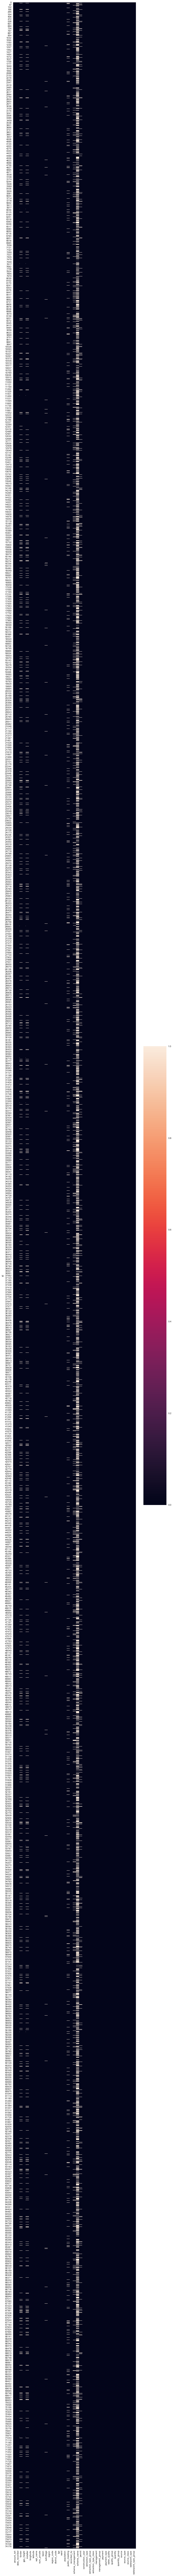

In [34]:
size = (11.7, 200)
fig, ax = plt.subplots(figsize=size)
sns.heatmap(df_logic_2, ax=ax)